In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
from darts import TimeSeries

df = pd.read_csv('../csv/2Jul67_feature.csv')
df['order_completed_at'] = pd.to_datetime(df['order_completed_at'])
df.tail()

,order_completed_at,unique_order_count,year,month,day,dayofweek_num,midmonth,payday,double_date
544,2024-06-28,142,2024,6,28,4,0,1,0
545,2024-06-29,126,2024,6,29,5,0,1,0
546,2024-06-30,161,2024,6,30,6,0,1,0
547,2024-07-01,142,2024,7,1,0,0,0,0
548,2024-07-02,158,2024,7,2,1,0,0,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_completed_at  549 non-null    datetime64[ns]
 1   unique_order_count  549 non-null    int64         
 2   year                549 non-null    int64         
 3   month               549 non-null    int64         
 4   day                 549 non-null    int64         
 5   dayofweek_num       549 non-null    int64         
 6   midmonth            549 non-null    int64         
 7   payday              549 non-null    int64         
 8   double_date         549 non-null    int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 38.7 KB


In [56]:
from darts.models import (
    LinearRegressionModel,
    RegressionModel,
    LightGBMModel,
    XGBModel,
    CatBoostModel,
)
from darts.metrics import mape, mse, mae

In [57]:
# make timeseries Object
series = TimeSeries.from_dataframe(df,
                                   time_col='order_completed_at',
                                   value_cols=['unique_order_count', 'year', 'month', 'day', 'dayofweek_num', 'midmonth', 'payday', 'double_date'],
                                   freq="D")

In [58]:
print(series)

<TimeSeries (DataArray) (order_completed_at: 549, component: 8, sample: 1)> Size: 35kB
array([[[1.500e+01],
        [2.023e+03],
        [1.000e+00],
        ...,
        [0.000e+00],
        [0.000e+00],
        [1.000e+00]],

       [[3.200e+01],
        [2.023e+03],
        [1.000e+00],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[8.900e+01],
        [2.023e+03],
        [1.000e+00],
        ...,
...
        ...,
        [0.000e+00],
        [1.000e+00],
        [0.000e+00]],

       [[1.420e+02],
        [2.024e+03],
        [7.000e+00],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.580e+02],
        [2.024e+03],
        [7.000e+00],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]]])
Coordinates:
  * order_completed_at  (order_completed_at) datetime64[ns] 4kB 2023-01-01 .....
  * component           (component) object 64B 'unique_order_count' ... 'doub...
Dimensions witho

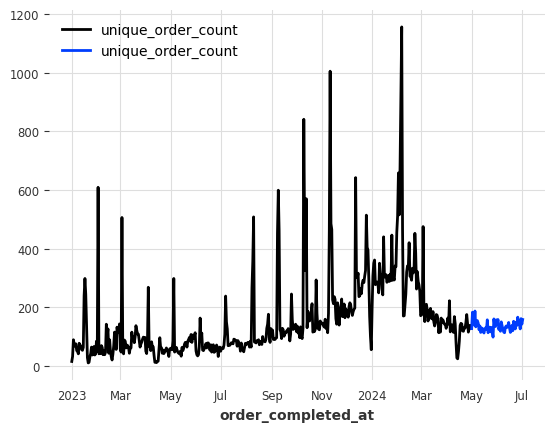

In [59]:
target_ts = series[['unique_order_count']]
future_cov_ts = series[['year', 'month', 'day', 'dayofweek_num', 'midmonth', 'payday', 'double_date']]

cut_off = pd.Timestamp("2024-05-01")

target_training, target_validation =target_ts.split_before(cut_off)

target_training.plot()
target_validation.plot()
plt.show()

In [60]:
# Making a parameter dictionary for use in the gridsearch function
# Gridsearch will return the best model that hasn't been trained yet.
from darts.models import LinearRegressionModel
from darts.metrics import mape, mae, mse, mase
from math import sqrt

parameters = {
    "lags": list(range(1, 36)),
    "lags_future_covariates": [(0,7)],
    "output_chunk_length": [7],
    "random_state": [42]
}

best_parameter = LinearRegressionModel.gridsearch(
    parameters=parameters,
    series = target_ts, #note (training + validation) X only training set!!!
    future_covariates= future_cov_ts,
    start=cut_off,
    forecast_horizon=7,
    stride=1,          
    last_points_only=False,  
    metric=mse,
    verbose=-1
)

  0%|          | 0/35 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/57 [00:00<?, ?it/s]

In [61]:
print(best_parameter)
best_model = best_parameter[0]

(LinearRegressionModel(lags=33, lags_past_covariates=None, lags_future_covariates=(0, 7), output_chunk_length=7, output_chunk_shift=0, add_encoders=None, likelihood=None, quantiles=None, random_state=42, multi_models=True, use_static_covariates=True), {'lags': 33, 'lags_future_covariates': (0, 7), 'output_chunk_length': 7, 'random_state': 42}, 3434.8198926228765)


In [62]:
best_model.fit(series=target_training, future_covariates=future_cov_ts)

LinearRegressionModel(lags=33, lags_past_covariates=None, lags_future_covariates=(0, 7), output_chunk_length=7, output_chunk_shift=0, add_encoders=None, likelihood=None, quantiles=None, random_state=42, multi_models=True, use_static_covariates=True)

In [63]:
from darts.models import LinearRegressionModel
from darts.metrics import mape, mae, mse, mase
from math import sqrt

# result from training , validation only
prediction = best_model.predict(len(target_validation))

In [64]:
mape_score = mape(target_validation, prediction)
print(f'score MAPE: {round(mape_score, 4)}')
print(f'score ACC: {100-(round(mape_score, 4))}')

mse_score = mse(target_validation, prediction)
print(f'score MSE: {round(mse_score, 4)}')

print(f'score RMSE: {round(sqrt(mse_score), 4)}')

mae_score = mae(target_validation, prediction)
print(f'score MAE: {round(mae_score, 4)}')

score MAPE: 38.0736
score ACC: 61.9264
score MSE: 5552.5799
score RMSE: 74.5156
score MAE: 51.1132


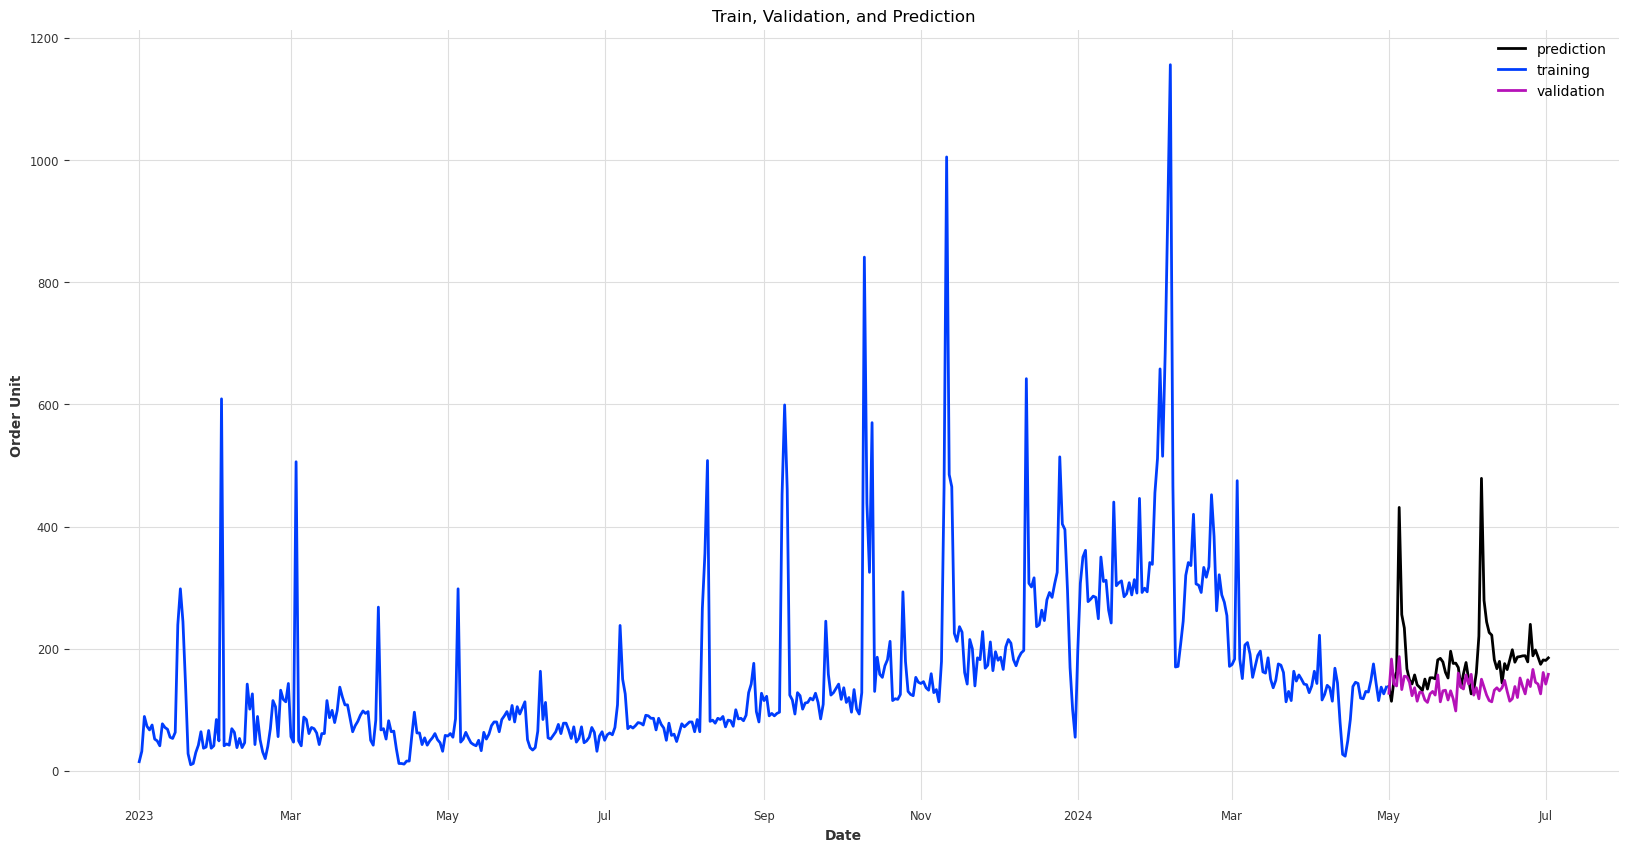

In [65]:
plt.figure(figsize=(20, 10))  # ปรับขนาดของภาพ (กว้าง x สูง)
##prediction
prediction.plot(label="prediction")
target_training.plot(label="training")
target_validation.plot(label="validation")

plt.legend()
plt.title('Train, Validation, and Prediction')
plt.xlabel('Date')
plt.ylabel('Order Unit')
plt.show()